In [129]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [130]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [131]:
#Carga de dataset
data = pd.read_csv('/content/houses_soacha.csv')

In [132]:
print(data)

     Unnamed: 0  Habitaciones  Baños  Estrato      Estado    Antigüedad  \
0             0           3.0    2.0      3.0       Bueno    1 a 8 años   
1             1           2.0    1.0      2.0       Bueno   9 a 15 años   
2             2           3.0    1.0      3.0  Remodelado    1 a 8 años   
3             3           NaN    NaN      NaN         NaN           NaN   
4             4           3.0    1.0      3.0  Remodelado   9 a 15 años   
..          ...           ...    ...      ...         ...           ...   
315         315           NaN    NaN      NaN         NaN           NaN   
316         316           2.0    1.0      3.0       Bueno  16 a 30 años   
317         317           3.0    2.0      3.0       Bueno    1 a 8 años   
318         318           3.0    2.0      3.0   Excelente    1 a 8 años   
319         319           3.0    1.0      3.0   Excelente    1 a 8 años   

     Piso N° Administración          Precio m² Tipo de apartamento  \
0        2.0   $ 79.000 COP  

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            320 non-null    int64  
 1   Habitaciones          239 non-null    float64
 2   Baños                 239 non-null    float64
 3   Estrato               239 non-null    float64
 4   Estado                179 non-null    object 
 5   Antigüedad            210 non-null    object 
 6   Piso N°               187 non-null    float64
 7   Administración        239 non-null    object 
 8   Precio m²             239 non-null    object 
 9   Tipo de apartamento   22 non-null     object 
 10  Parqueaderos          32 non-null     object 
 11  Precio                320 non-null    int64  
 12  Área construída (m²)  239 non-null    object 
 13  Área privada (m²)     239 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 35.1+ KB


In [134]:
columnas_eliminar = ['Administración','Precio m²']
simbolo = '$'
simbolo2='*m²'
simbolo3='COP'
columnas_eliminar2=['Precio m²']
simbolo4='.'
simbolo5=','
for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)
    data[columna] = data[columna].str.replace(simbolo2, '', regex=False)
    data[columna] = data[columna].str.replace(simbolo3, '', regex=False)
for columna2 in columnas_eliminar2:
    data[columna2] = data[columna2].str.replace(simbolo4, '', regex=False)
    data[columna2] = data[columna2].str.replace(simbolo5, '.', regex=False)

In [135]:
print(data)

     Unnamed: 0  Habitaciones  Baños  Estrato      Estado    Antigüedad  \
0             0           3.0    2.0      3.0       Bueno    1 a 8 años   
1             1           2.0    1.0      2.0       Bueno   9 a 15 años   
2             2           3.0    1.0      3.0  Remodelado    1 a 8 años   
3             3           NaN    NaN      NaN         NaN           NaN   
4             4           3.0    1.0      3.0  Remodelado   9 a 15 años   
..          ...           ...    ...      ...         ...           ...   
315         315           NaN    NaN      NaN         NaN           NaN   
316         316           2.0    1.0      3.0       Bueno  16 a 30 años   
317         317           3.0    2.0      3.0       Bueno    1 a 8 años   
318         318           3.0    2.0      3.0   Excelente    1 a 8 años   
319         319           3.0    1.0      3.0   Excelente    1 a 8 años   

     Piso N° Administración    Precio m² Tipo de apartamento Parqueaderos  \
0        2.0        79

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            320 non-null    int64  
 1   Habitaciones          239 non-null    float64
 2   Baños                 239 non-null    float64
 3   Estrato               239 non-null    float64
 4   Estado                179 non-null    object 
 5   Antigüedad            210 non-null    object 
 6   Piso N°               187 non-null    float64
 7   Administración        239 non-null    object 
 8   Precio m²             239 non-null    object 
 9   Tipo de apartamento   22 non-null     object 
 10  Parqueaderos          32 non-null     object 
 11  Precio                320 non-null    int64  
 12  Área construída (m²)  239 non-null    object 
 13  Área privada (m²)     239 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 35.1+ KB


In [137]:

# Supongamos que 'data' es tu DataFrame
columna_categorica = 'Administración'
columna_precio='Precio m²'
columna_numerica = 'administrador'
columna_pre='Preciom2'

# Crea una nueva columna numérica y copia los valores de la columna categórica y precio
data[columna_numerica] = pd.to_numeric(data[columna_categorica], errors='coerce')
data[columna_pre] = pd.to_numeric(data[columna_precio], errors='coerce')

# Elimina la columna categórica original y precio
data.drop(columna_categorica, axis=1, inplace=True)
data.drop(columna_precio, axis=1, inplace=True)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            320 non-null    int64  
 1   Habitaciones          239 non-null    float64
 2   Baños                 239 non-null    float64
 3   Estrato               239 non-null    float64
 4   Estado                179 non-null    object 
 5   Antigüedad            210 non-null    object 
 6   Piso N°               187 non-null    float64
 7   Tipo de apartamento   22 non-null     object 
 8   Parqueaderos          32 non-null     object 
 9   Precio                320 non-null    int64  
 10  Área construída (m²)  239 non-null    object 
 11  Área privada (m²)     239 non-null    float64
 12  administrador         135 non-null    float64
 13  Preciom2              239 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 35.1+ KB


In [139]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [140]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [141]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [142]:
#resultado
print(data)

     Unnamed: 0  Habitaciones  Baños  Estrato  Estado  Antigüedad  Piso N°  \
0             0           3.0    2.0      3.0       0           0      2.0   
1             1           2.0    1.0      2.0       0           2      1.0   
2             2           3.0    1.0      3.0       2           0      6.0   
3             3           NaN    NaN      NaN       3           5      NaN   
4             4           3.0    1.0      3.0       2           2      6.0   
..          ...           ...    ...      ...     ...         ...      ...   
315         315           NaN    NaN      NaN       3           5      NaN   
316         316           2.0    1.0      3.0       0           1      3.0   
317         317           3.0    2.0      3.0       0           0      1.0   
318         318           3.0    2.0      3.0       1           0      2.0   
319         319           3.0    1.0      3.0       1           0      2.0   

     Tipo de apartamento  Parqueaderos     Precio  Área constru

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            320 non-null    int64  
 1   Habitaciones          239 non-null    float64
 2   Baños                 239 non-null    float64
 3   Estrato               239 non-null    float64
 4   Estado                320 non-null    int64  
 5   Antigüedad            320 non-null    int64  
 6   Piso N°               187 non-null    float64
 7   Tipo de apartamento   320 non-null    int64  
 8   Parqueaderos          320 non-null    int64  
 9   Precio                320 non-null    int64  
 10  Área construída (m²)  320 non-null    int64  
 11  Área privada (m²)     239 non-null    float64
 12  administrador         135 non-null    float64
 13  Preciom2              239 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 35.1 KB


In [144]:
#llenar datos vacios
columnas_especificas = ['Habitaciones', 'Baños','Estrato','Piso N°','Área privada (m²)','administrador','Preciom2']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            320 non-null    int64  
 1   Habitaciones          320 non-null    float64
 2   Baños                 320 non-null    float64
 3   Estrato               320 non-null    float64
 4   Estado                320 non-null    int64  
 5   Antigüedad            320 non-null    int64  
 6   Piso N°               320 non-null    float64
 7   Tipo de apartamento   320 non-null    int64  
 8   Parqueaderos          320 non-null    int64  
 9   Precio                320 non-null    int64  
 10  Área construída (m²)  320 non-null    int64  
 11  Área privada (m²)     320 non-null    float64
 12  administrador         320 non-null    float64
 13  Preciom2              320 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 35.1 KB


In [146]:
# Lectura de Datos
X = data.iloc[:, :13]
y = data.iloc[:, 13]
m = y.size

In [147]:
print(X)
print('*'*25)
print(y)

     Unnamed: 0  Habitaciones     Baños   Estrato  Estado  Antigüedad  \
0             0      3.000000  2.000000  3.000000       0           0   
1             1      2.000000  1.000000  2.000000       0           2   
2             2      3.000000  1.000000  3.000000       2           0   
3             3      2.753138  1.389121  2.707113       3           5   
4             4      3.000000  1.000000  3.000000       2           2   
..          ...           ...       ...       ...     ...         ...   
315         315      2.753138  1.389121  2.707113       3           5   
316         316      2.000000  1.000000  3.000000       0           1   
317         317      3.000000  2.000000  3.000000       0           0   
318         318      3.000000  2.000000  3.000000       1           0   
319         319      3.000000  1.000000  3.000000       1           0   

      Piso N°  Tipo de apartamento  Parqueaderos     Precio  \
0    2.000000                    1             2  130000000 

In [148]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [149]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Unnamed: 0  Habitaciones     Baños   Estrato  Estado  Antigüedad  \
0             0      3.000000  2.000000  3.000000       0           0   
1             1      2.000000  1.000000  2.000000       0           2   
2             2      3.000000  1.000000  3.000000       2           0   
3             3      2.753138  1.389121  2.707113       3           5   
4             4      3.000000  1.000000  3.000000       2           2   
..          ...           ...       ...       ...     ...         ...   
315         315      2.753138  1.389121  2.707113       3           5   
316         316      2.000000  1.000000  3.000000       0           1   
317         317      3.000000  2.000000  3.000000       0           0   
318         318      3.000000  2.000000  3.000000       1           0   
319         319      3.000000  1.000000  3.000000       1           0   

      Piso N°  Tipo de apartamento  Parqueaderos     Precio  \
0    2.000000                    1             2  130000000 

In [150]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [151]:
print(X)

[[ 1.         -1.72664658  0.62181681 ... -0.40693936 -1.98929828
   1.10856133]
 [ 1.         -1.71582121 -1.89706823 ... -1.08783136  0.29448564
   0.        ]
 [ 1.         -1.70499584  0.62181681 ...  1.03995614  1.33256924
  -1.49071854]
 ...
 [ 1.          1.70499584  0.62181681 ...  0.61439864  1.1768567
   1.19819167]
 [ 1.          1.71582121  0.62181681 ...  0.95484464  1.64399432
   0.48114895]
 [ 1.          1.72664658  0.62181681 ... -0.74738536 -1.98929828
   0.        ]]


In [152]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [153]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [2265528.40298991  -10300.67556805  -33472.38497362    4910.54368702
   37021.32143792   21058.33214239   57280.94385882  -21282.72442218
   29773.63368636  -11564.38824962  205193.2056921  -167704.47968344
  -37510.46756172   42047.59707344]
El valor predecido es (usando el descenso por el gradiente): 3176506636215.7739


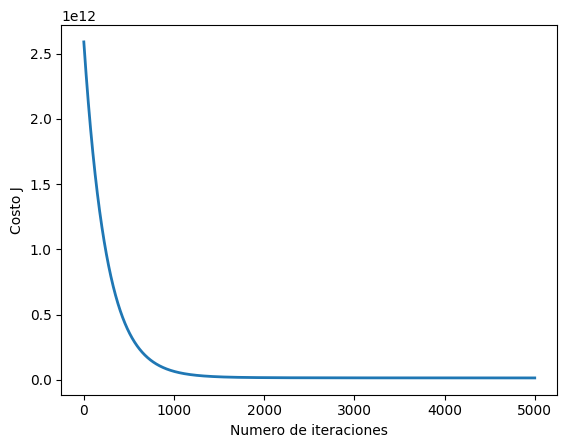

In [154]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.002
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(14)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un Apartamentos
X_array = [1, 2, 130, 1, 2, 3, 5, 92700, 28900000, 2, 0, 15600000, 80,50]
X_array[1:14] = (X_array[1:14] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))